In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
% cd "/content/gdrive/My Drive/efnn"

In [ ]:
!pip install ipython-autotime
%load_ext autotime
% tensorflow_version 2.x
import numpy as np
import tensorflow as tf
import cv2

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=874ebef9bb2530685283416feeae9e0bfdca12a433d57b43f587ef0106b97028
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
# model = tf.keras.models.load_model("regression_model_2evs.hdf5")
model = tf.keras.models.load_model("2hidden.hdf5")

# when the model is compiled the prediction takes a longer time
# model.compile(loss='mean_squared_error', optimizer= tf.keras.optimizers.Adam(lr = 0.001))

time: 527 ms


In [ ]:
import os
from efnn.efimg import Exposures

SAMPLES_DIR = "./dataset/jpg"

# SAMPLE = 'OtterPoint'
# EVS = ['-6', '-4', '-2']

# SAMPLE = 'Zentrum'
# EVS = ['-3', '+0', '+3']

# SAMPLE = 'BandonSunset(2)'
# EVS = ['-6', '-2', '+1']

SAMPLE = 'HDRMark'
EVS = ['-8', '-4', '+1']

SAMPLES_DIR = "./EXTERNAL_SAMPLES"
SAMPLE = 'SAMPLE001'
EVS = ['-3', '+0', '+3']

# SAMPLE = 'HDRMark'
# EVS = ['-8', '+1']

# SAMPLE = 'WallDrug'
# EVS = ['-8', '-3', '+0']


x = Exposures(
        os.path.join(SAMPLES_DIR, SAMPLE), 
        evs = [f'{SAMPLE}-EV{ev}' for ev in EVS]
    )

# for ev in x.evs:
#     x.exposures[ev] = cv2.resize(x.exposures[ev], (800,640))

x.create_np_data()

print(x.np_data['data'])
print(x.np_data['data'].shape)

[[ 18  26  26 ... 194 229 232]
 [ 17  24  27 ... 177 221 222]
 [ 13  25  27 ... 179 226 230]
 ...
 [ 27  22  23 ... 192 192 176]
 [ 25  23  23 ... 194 193 179]
 [ 20  18  18 ... 196 196 182]]
(750000, 9)
time: 3.08 s


In [ ]:
# fusion = model.predict(x.np_data['data'] / 255)
a = model.predict_on_batch(x.np_data['data'] / 255)

time: 134 ms


In [ ]:
a = a * 255
# a = a.reshape((640,800,3))
a = a.reshape(x.ef.shape)

time: 8.6 ms


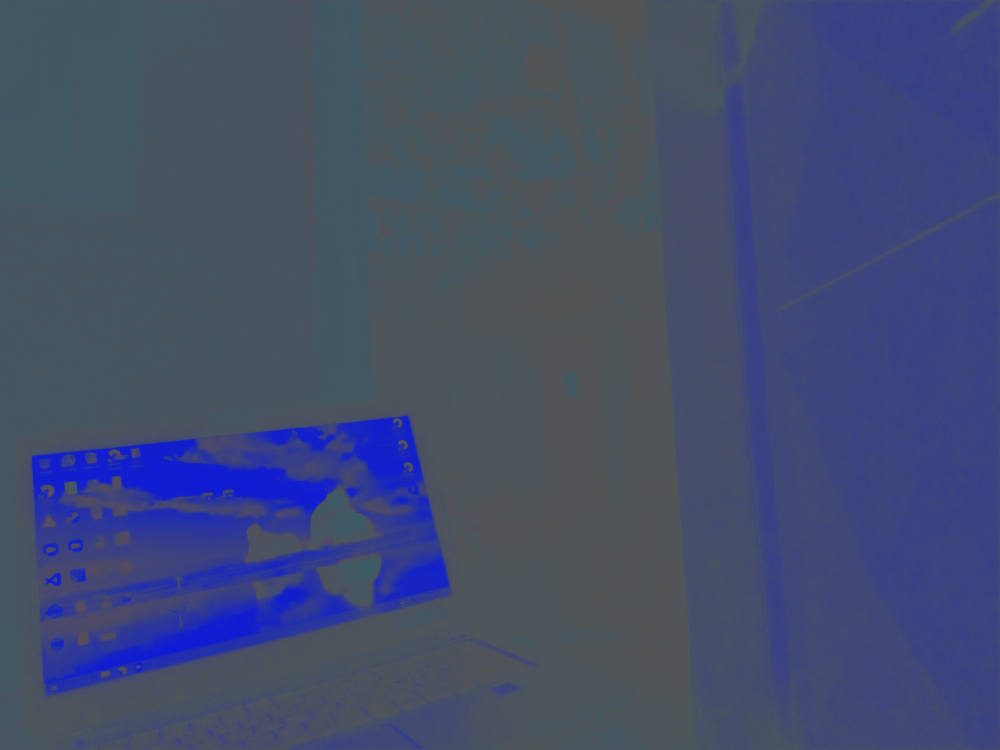

time: 371 ms


In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(a)

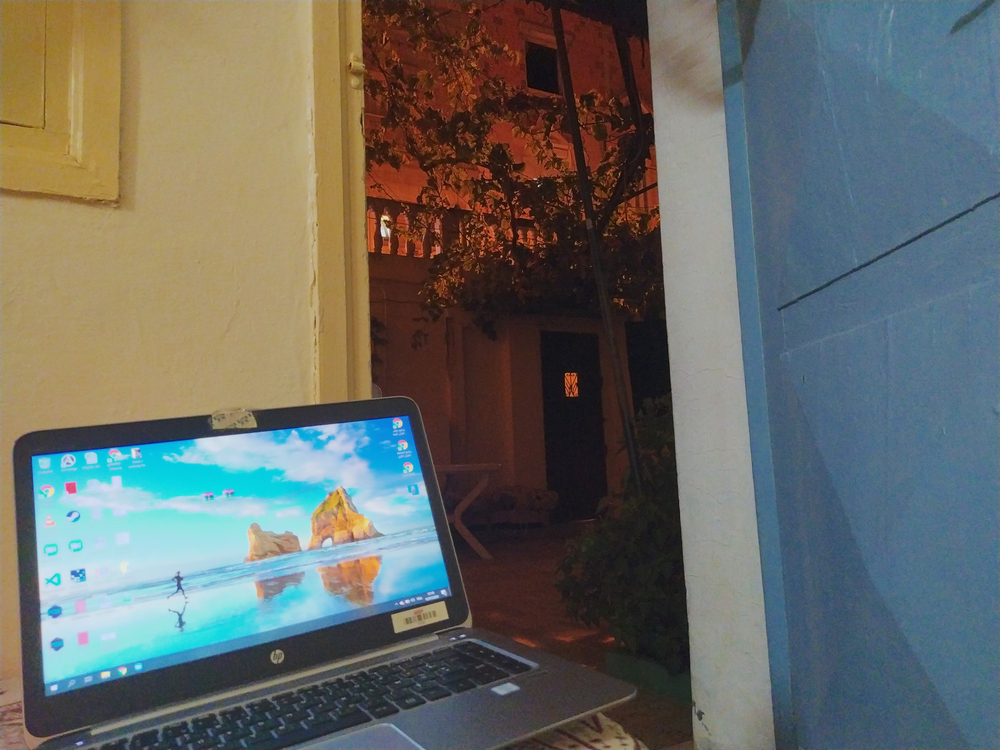

time: 428 ms


In [ ]:
# cv2_imshow(x.exposures['HDRMark-EV-4'])
cv2_imshow(x.ef)
# cv2_imshow( cv2.resize(x.ef, (1000,750)) )

In [ ]:
! wget "https://images.hdrsoft.com/images/samples/sample-bracketed-photos.zip"
! unzip "sample-bracketed-photos.zip"
! pwd && ls sample-bracketed-photos

--2020-04-17 02:24:53--  https://images.hdrsoft.com/images/samples/sample-bracketed-photos.zip
Resolving images.hdrsoft.com (images.hdrsoft.com)... 151.139.128.10
Connecting to images.hdrsoft.com (images.hdrsoft.com)|151.139.128.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79871962 (76M) [application/zip]
Saving to: ‘sample-bracketed-photos.zip’

sample-bracketed-ph 100%[===================>]  76.17M  34.3MB/s    in 2.2s    

2020-04-17 02:24:58 (34.3 MB/s) - ‘sample-bracketed-photos.zip’ saved [79871962/79871962]

Archive:  sample-bracketed-photos.zip
   creating: sample-bracketed-photos/Bali-Tukad-Cepung-Waterfall/
  inflating: sample-bracketed-photos/Bali-Tukad-Cepung-Waterfall/Copyright Info.txt  
  inflating: sample-bracketed-photos/Bali-Tukad-Cepung-Waterfall/Waterfall.jpg  
  inflating: sample-bracketed-photos/Bali-Tukad-Cepung-Waterfall/Waterfall_over.jpg  
  inflating: sample-bracketed-photos/Bali-Tukad-Cepung-Waterfall/Waterfall_under.jpg  
   

In [ ]:
import os
from efnn.efimg import Exposures

# SAMPLES_DIR = "./sample-bracketed-photos/Cove-Point-Lighthouse"
# x = Exposures( SAMPLES_DIR, evs = [ f'Lighthouse{ev}' for ev in ['_under', '_over'] ])

SAMPLES_DIR = "./sample-bracketed-photos/Venice-Grand-Canal"
x = Exposures( SAMPLES_DIR, evs = [ f'venice{ev}' for ev in ['_under', '_over'] ])

for ev in x.evs:
    x.exposures[ev] = cv2.resize(x.exposures[ev], (800,640))

x.create_ef()

x.create_np_data()

print(x.np_data['data'])
print(x.np_data['data'].shape)

[INFO]: ./sample-bracketed-photos/Venice-Grand-Canal Creating Fusion
[[151 184 199 253 253 253]
 [152 185 200 254 254 254]
 [152 185 200 254 254 254]
 ...
 [  0   3   1  61  68  61]
 [  0   3   1  58  64  59]
 [  0   3   1  58  64  59]]
(512000, 6)
time: 2.24 s


In [ ]:
a = model.predict_on_batch(x.np_data['data'] / 255)
a = a * 255
a = a.reshape((640,800,3))

time: 44.8 ms


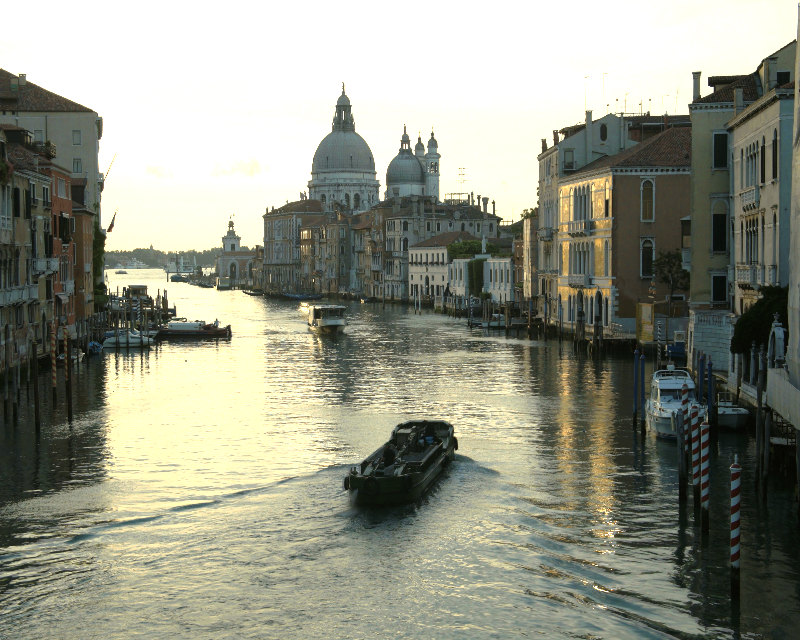

time: 191 ms


In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(a)

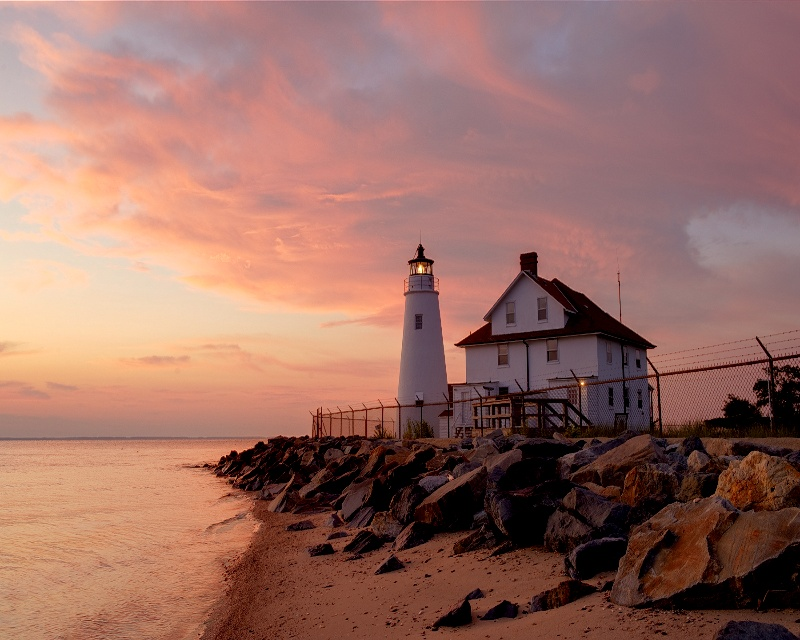

time: 251 ms


In [ ]:
cv2_imshow(x.ef)

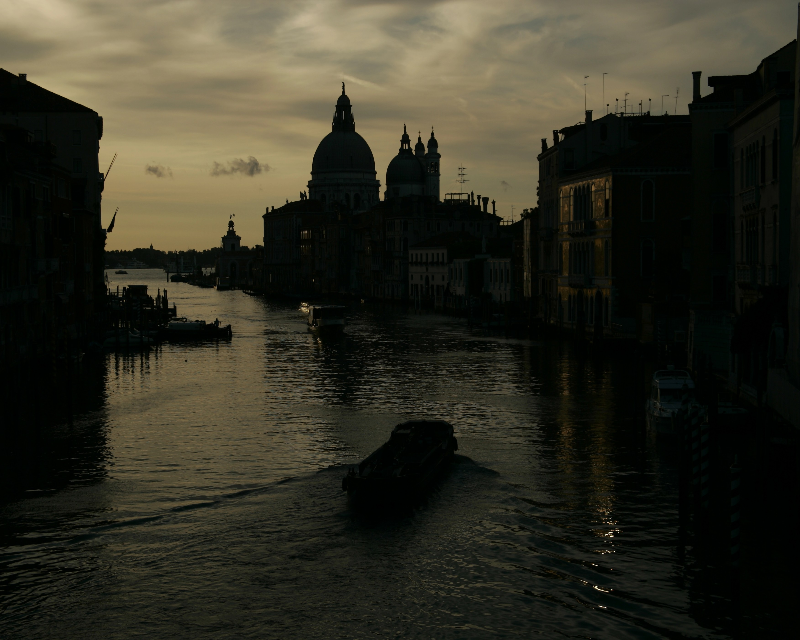

time: 268 ms


In [ ]:
cv2_imshow(x.exposures['venice_under'])

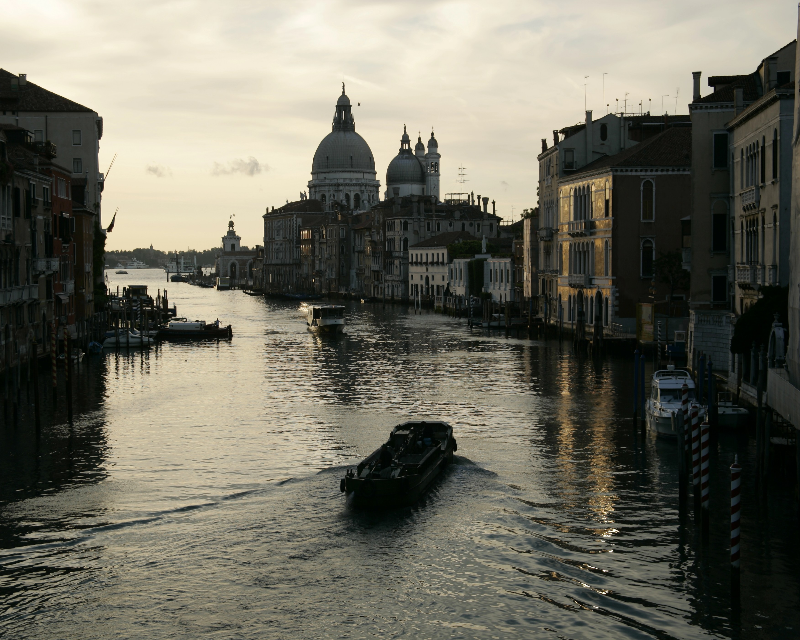

time: 235 ms


In [ ]:
cv2_imshow(x.exposures['venice'])

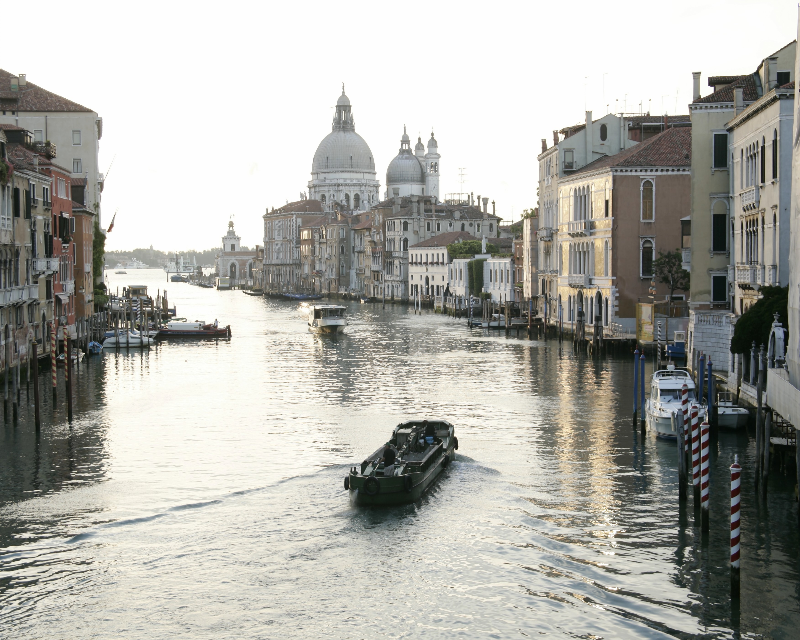

time: 180 ms


In [ ]:
cv2_imshow(x.exposures['venice_over'])

In [ ]:
! du -h --max-depth=1 .

7.4M	./Colab Notebooks
12G	./dataset
4.0K	./.ipynb_checkpoints
1.5M	./efnn
186M	./ImageMagick-7.0.10-2
1.6G	./archive
51M	./ImageMagick-7.0.10-3
4.0M	./Venice-Grand-Canal
14G	.
time: 1min 26s
